In [1]:
import numpy as np
import pandas as pd
from ProjectDataBase import *

stardle_db = pd.read_csv('NE PAS TOUCHER.csv', na_values = ['               ','       '])

stardle_db

,name,cargo_capacity,mass,crew,manufacturer,type,status,role,price,release_date,price_ingame,scm,max,length,beam,height
0,100i,2,48143,1,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Touring'}",50.0,2020,1146600.0,260.0,1425.0,19.00,12.00,5.00
1,125a,2,48143,1,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Fighter'}",60.0,2020,1587600.0,260.0,1425.0,19.00,12.00,5.00
2,135c,6,48143,1,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Freight'}",65.0,2020,1490580.0,260.0,1425.0,19.00,12.00,5.00
3,300i,8,79677,1,Origin Jumpworks,multi,flight-ready,"{'0': 'Touring', '1': 'Luxury'}",60.0,2014,1375920.0,260.0,1425.0,27.00,17.00,8.00
4,315p,12,80592,1,Origin Jumpworks,exploration,flight-ready,{'0': 'Pathfinder'},65.0,2014,1490580.0,260.0,1425.0,27.00,17.00,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,X1 Force,0,4730,1,Origin Jumpworks,exploration,flight-ready,{'0': 'Combat'},50.0,2023,132300.0,207.0,569.0,1.55,5.19,1.87
197,X1 Velocity,0,4730,1,Origin Jumpworks,competition,flight-ready,{'0': 'Racing'},45.0,2023,119070.0,222.0,611.0,1.55,5.19,1.87
198,Zeus CL Mk II,128,295000,3,Roberts Space Industries,transport,flight-ready,{'0': 'Medium Freight'},150.0,2024,6804000.0,200.0,1000.0,45.70,34.30,7.00
199,Zeus ES Mk II,32,295000,3,Roberts Space Industries,exploration,flight-ready,{'0': 'Expedition'},150.0,2024,4422600.0,200.0,1050.0,45.70,34.30,7.00


In [3]:
ingame = pd.read_csv('#DPSCalculatorCART(1).csv')
#ingame.drop(['Shop','Location','System','Quantity','Unnamed: 6'],axis=1,inplace=True)
Ingame = pd.DataFrame.to_dict(ingame)
valeurs = list(Ingame.values())
noms = list(valeurs[0].values())
P={}
for name,prix in zip(noms,list(valeurs[5].values())):
    P[name] = prix
    
P = dict(sorted(P.items()))

In [28]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the original DataFrame for comparison
n_df = stardle_db.copy()
# Identify numerical columns
numerical_columns = n_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nNumerical columns identified: {numerical_columns}")

# Create and fit the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the numerical columns and replace original values
n_df[numerical_columns] = scaler.fit_transform(n_df[numerical_columns])


# Display summary statistics for comparison
print("\nOriginal DataFrame - Summary Statistics:")
print(stardle_db[numerical_columns].describe())

print("\nNormalized DataFrame - Summary Statistics:")
print(n_df[numerical_columns].describe())

print("\nStandardization completed successfully!")
print("Note: After standardization, each numerical column should have a mean of ~0 and standard deviation of ~1.")



n_df.to_csv('normalized_db.csv', index=False)


Numerical columns identified: ['cargo_capacity ', 'crew ', 'price  ', 'price_ingame   ', 'scm    ', 'max    ', 'length ', 'beam   ', 'height']

Original DataFrame - Summary Statistics:
       cargo_capacity          crew        price    price_ingame     \
count     2.010000e+02  2.010000e+02  2.010000e+02     1.480000e+02   
mean     -1.767519e-17 -2.651279e-17  1.767519e-17     5.561448e+06   
std       1.002497e+00  1.002497e+00  1.002497e+00     9.435651e+06   
min      -1.067499e-01 -3.351947e-01 -7.125052e-01     2.000000e+00   
25%      -1.067499e-01 -3.351947e-01 -5.327204e-01     6.741000e+05   
50%      -1.067499e-01 -1.781454e-01 -2.630433e-01     2.050650e+06   
75%      -1.002485e-01 -2.109617e-02  1.115083e-01     5.435640e+06   
max       1.378721e+01  1.207170e+01  8.276733e+00     6.535620e+07   

            scm         max           length      beam           height  
count  1.710000e+02  167.000000  2.010000e+02  201.000000  2.010000e+02  
mean   2.597013e-18    0.0

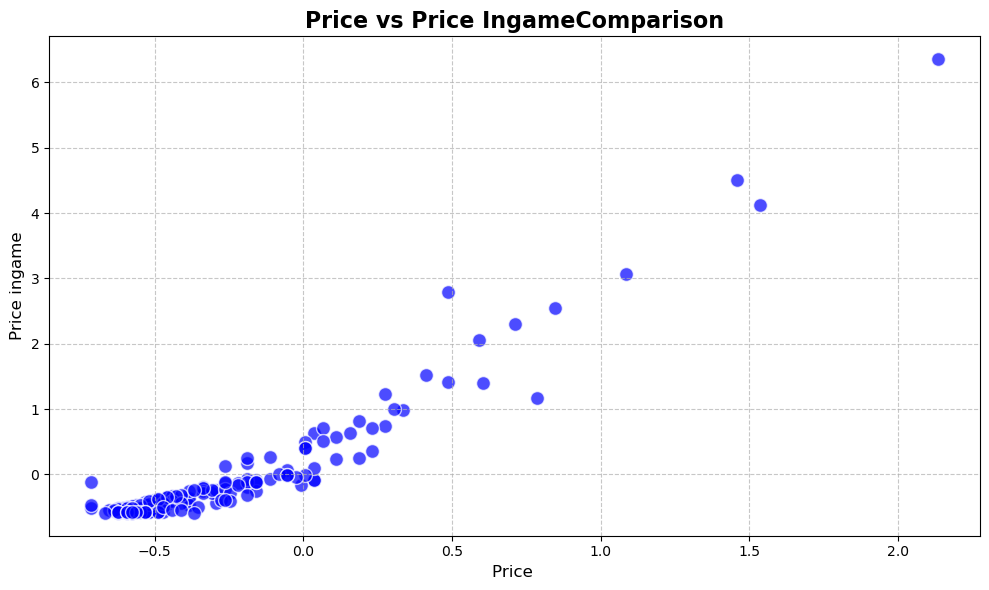

Number of data points: 148
Correlation coefficient: 0.9475111545125124


In [14]:
import matplotlib.pyplot as plt
# Clean and convert price and mass columns to numeric values
# This ensures any string values or other non-numeric data is properly handled
n_df['price  '] = pd.to_numeric(n_df['price  '], errors='coerce')
n_df['price_ingame   '] = pd.to_numeric(n_df['price_ingame   '], errors='coerce')

# Drop rows where either price or mass is NaN
df_clean = n_df.dropna(subset=['price  ', 'price_ingame   '])

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['price  '], df_clean['price_ingame   '], alpha=0.7, c='blue', edgecolors='w', s=100)

# Add title and labels
plt.title('Price vs Price IngameComparison', fontsize=16, fontweight='bold')
plt.xlabel('Price ', fontsize=12)
plt.ylabel('Price ingame', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Improve aesthetics
plt.tight_layout()

# Display the plot
plt.show()  # Display the figure

# Print some basic statistics
print("Number of data points:", len(df_clean))
print("Correlation coefficient:", df_clean['price  '].corr(df_clean['price_ingame   ']))



Pente :  [2.15038394]
Ordonnée à l'origine :  0.5479744843746402
Racine carrée de l'erreur quadratique moyenne :  0.10937815587400672
Sccore R2 :  0.3192553119730154


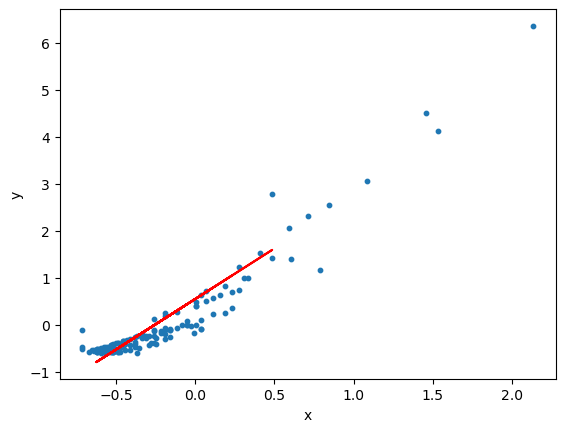

In [15]:
# Importations

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Extract the features and target
X = n_df['price  '].values  
y = n_df['price_ingame   '].values  

# Drop any rows with NaN values
valid_indices = ~(np.isnan(X) | np.isnan(y))
X = X[valid_indices]
y = y[valid_indices]

# Implémentation avec sckit-learn
# initialisation du modèle
regression_model = LinearRegression()
# Adapter les données (entraînement du modèle)
X_reshaped = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_reshaped,y, test_size=0.2,)
regression_model.fit(X_train,y_train)
# Prédiction
y_predicted = regression_model.predict(X_test)
# Évaluation du modèle
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
# Affichage des valeurs
print("Pente : " ,regression_model.coef_)
print("Ordonnée à l'origine : ", regression_model.intercept_)
print("Racine carrée de l'erreur quadratique moyenne : ", rmse)
print('Sccore R2 : ', r2)
# Tracée des valeurs
# Points de données
plt.scatter(X_reshaped, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
# Valeurs prédites
plt.plot(X_test, y_predicted, color='r')
plt.show()

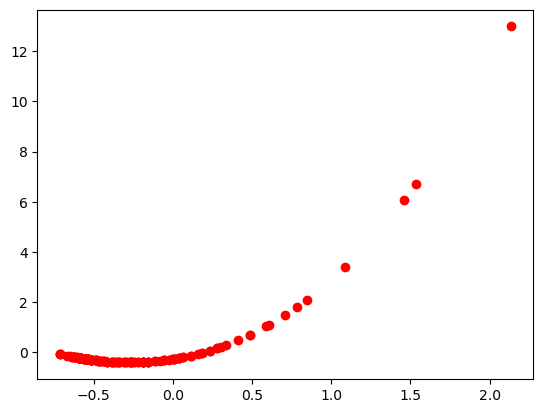

In [ ]:
coeff = np.polyfit(X, y, 2)

def f(x):
    return coeff[0]+coeff[1]*x+coeff[2]*x**2
plt.scatter(X, f(X), c='r')